# EDA Of Haberman Dataset


### About Hnaberman dataset

- The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings     Hospital on the survival of patients who had undergone surgery for breast.
- Haberman data set has 4 features, which are (Age, Op_Year, axil_nodes, Surv_status).
- Surv_status is the output variable or dependent variable or class variable. Remaining features are input variables or Independent variables.
- Shape of the data set is 306x4 (306 rows and 4 columns).
- When Survival status is 1 : Patient survived 5 years or longer.
- When Survival status is 2 : Patient died within 5 years.

### About axillary nodes:

- Breast cancer frequently spreads to the axillary (armpit) lymph nodes. Traditionally, when breast cancers were removed, an operation known as axillary lymph node.
- Whereas the hazard rate for those with negative, or 1 to 3 positive nodes, was relatively low and constant, in those with ≫4 positive nodes the risk in the early years was much greater


# Habeman Dataset Objective:

##### Classify the patients based on survival status, who had undergone surgery for breast cancer.
##### Survival status is 1 represents "Patient survived 5 years or longer".
##### Survival status is 2 represents "Patient died within 5 years".

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Haberman dataset using read_csv function

haberman = pd.read_csv('haberman.csv')
#Preview of Haberman dataset
haberman.head()
haberman.tail()

,Age,Op_Year,axil_nodes,Surv_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


# Basic opertions on Haberman dataset

In [0]:
#Shape of Haberman dataset
haberman.shape

(306, 4)

In [0]:
#Haberman dataset column info
haberman.columns

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')

In [0]:
haberman['Surv_status'].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

### Observations
- In the above value_counts results says, 2 (Patient died within 5 years) is significantly lower than 1 (patient survived longer than 5 years).
- Based on above analysis we can say Haberman is "Imbalanced dataset".

# 2-D Scatter Plot

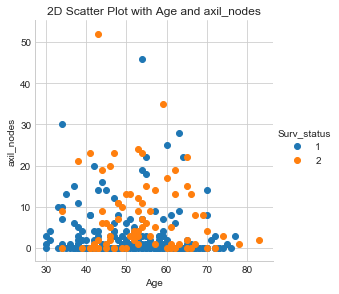

In [0]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="Surv_status", size=4)\
   .map(plt.scatter, "Age", "axil_nodes")\
   .add_legend();
plt.title("2D Scatter Plot with Age and axil_nodes")
plt.show()

### Observations:
- Notice that using Age and axil_nodes features, Blue and Orange points cannot be easily separated.
- Here Blue points indicates "Patient who survived 5 years or longer", and Orange points indicates "Patient died within 5 years".
- Separating Blue points from Orange points bit harder as they have considerable overlap.
- Here number of possible combinations are 3c2(i.e 3 combinations)
- Possible pair combinations are (Age, Op_Year),(Age, axil_nodes), (Op_Year, axil_nodes).

# Pair plot

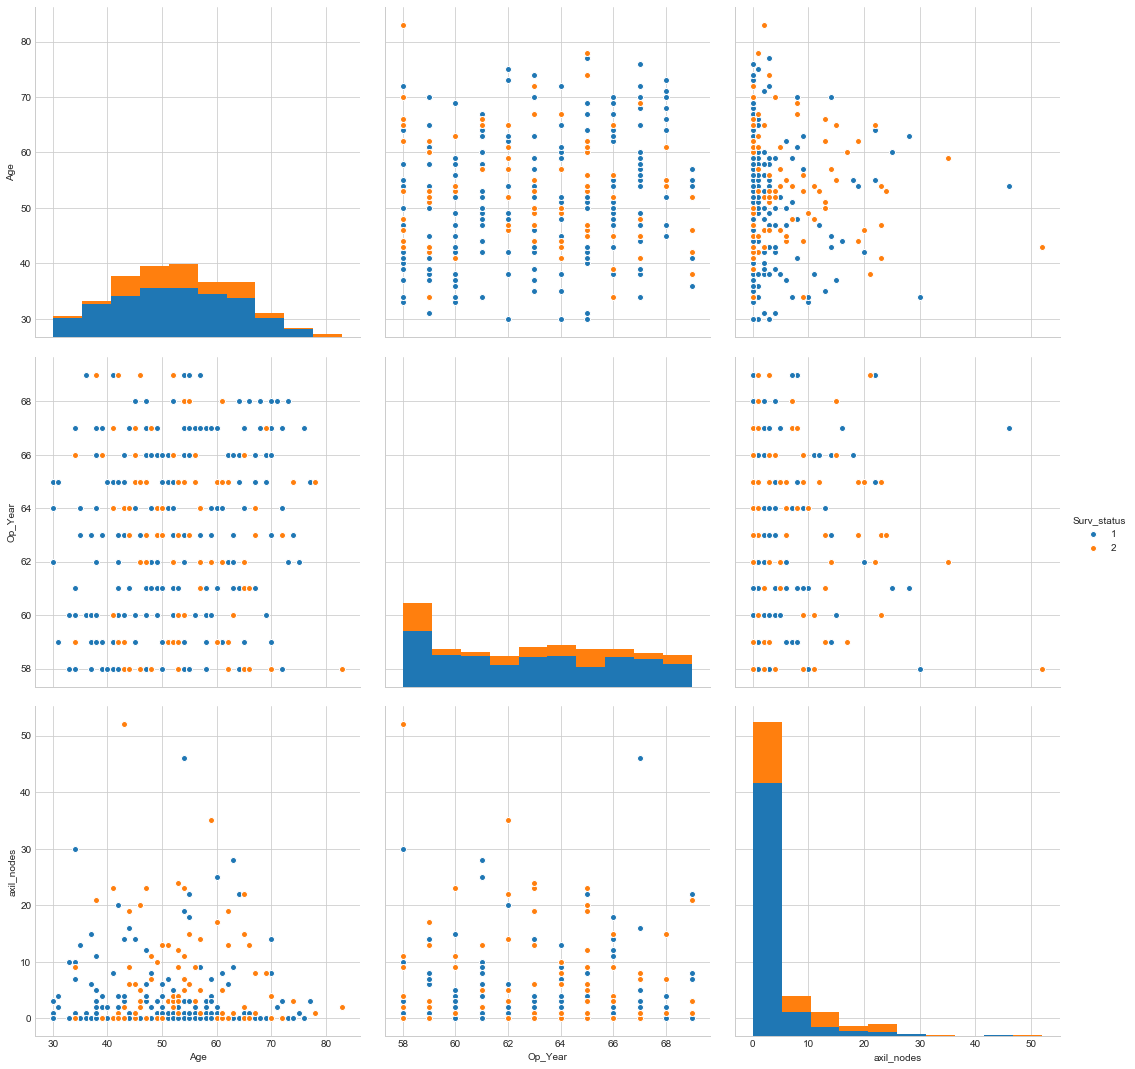

In [0]:
from matplotlib.pyplot import figure

plt.close(); #closing existing plot diagram
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Surv_status", vars=['Age', 'Op_Year', 'axil_nodes'], size=5);
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.show()

### observations:
- Since Haberman data set has 3 independent variables and 1 dependent variable. I was expecting to get 3c2 plot. But I got 4c2 plot first time.
- This is because of my class variable(Surv_status) has numerical entries. So I used "vars" option in pairplot method, then I got 3c2(3 possibles) plots.
- Notice that in each of the pair plot, there are considerable overlap that we cannot distinguish my Blue points from Orange points.
- Since each pair plot has considerable overlap, we cannot draw a line to sepearate Survival status.


# 1-D scatter plot

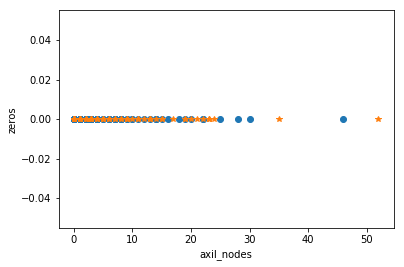

In [0]:
#1-D Scatter plot of axil_nodes
import numpy as np

patient_longerthan_5years = haberman.loc[haberman['Surv_status'] == 1]
patient_died_within_5years = haberman.loc[haberman['Surv_status'] == 2]


plt.plot(patient_longerthan_5years['axil_nodes'], np.zeros_like(patient_longerthan_5years['axil_nodes']), 'o')
plt.plot(patient_died_within_5years['axil_nodes'], np.zeros_like(patient_died_within_5years['axil_nodes']), '*')
plt.xlabel('axil_nodes')
plt.ylabel('zeros')
plt.show()

### Observation:
- Here Blue points indicates patient_longerthan_5years = 225 data points and Orange points indicates patient_died_within_5years = 81 data points.
- Since there are considerable overlap in 1D scatter plot, we cannot count how many patients are survived or not survived in specific range. 

- To overcome this drawback, we move to Histogram. Histogram is used to find the frequency/count in perticular range.

# Histogram

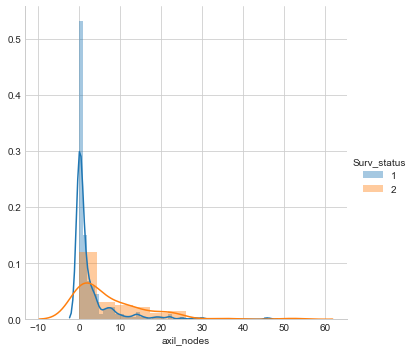

In [0]:
# Histogram of axil_nodes.

plt.close(); #closing previous plot
sns.FacetGrid(haberman, hue="Surv_status", size=5)\
   .map(sns.distplot, "axil_nodes")\
   .add_legend();

plt.show()

### Observations:
- Histogram tells you how many points are present in particular range. Also we can find which feature is more important using Histogram. It's a Kind of univariate analysys.
- Histogram of Blue and Orange points has considerable overlap. for classifying blue and orange points, I will set the threshold at 2.4, So that I can write the model to seperate patients who survived more than 5 years and who do not survived.

##### Creating simple model based on threshold value 2.4
if (axil_nodes <= 2.4) {
    Surv_status = 1 (Patient who survived longer than 5 years)
} else {
    Surv_status = 2 (Patient who died within 5 years)
}

###### Note: Please find the attached screens of Histogram.

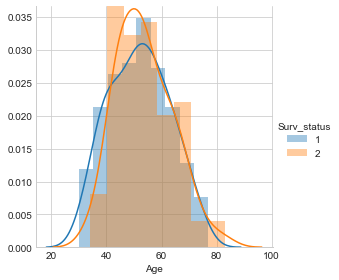

In [0]:
# Histogram of Age.

plt.close(); # closing the previous plot

sns.FacetGrid(haberman, hue="Surv_status", size=4)\
   .map(sns.distplot, "Age")\
   .add_legend();

plt.show();

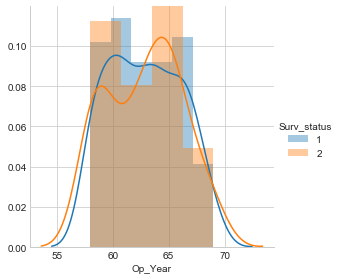

In [0]:
# Histogram of Op_Year.

plt.close(); # closing previous plot
sns.FacetGrid(haberman, hue="Surv_status", size=4)\
   .map(sns.distplot, "Op_Year")\
   .add_legend();

plt.show();

### Observation:
- axil_nodes is useful feature to separate Survival status of patient.
- Remaining features has considerable overlap, so we cannot write model.

# Cumilative Distribution Function (CDF)

counts =  [ 0.18164251  0.0173913   0.00483092  0.0057971   0.00386473  0.00096618
  0.00193237  0.          0.          0.00096618]
bin_edges =  [  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]
sum of counts =  0.217391304348
pdf =  [ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
cdf =  [ 0.83555556  0.91555556  0.93777778  0.96444444  0.98222222  0.98666667
  0.99555556  0.99555556  0.99555556  1.        ]


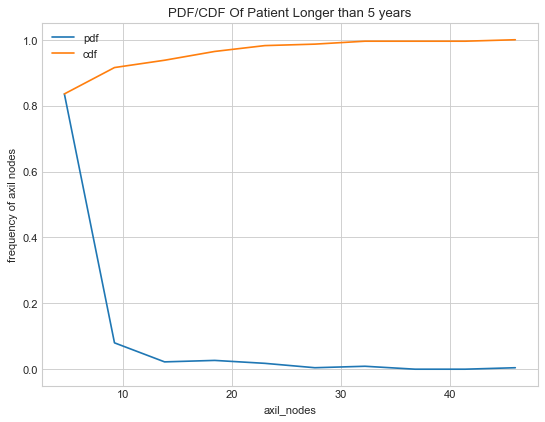

In [0]:
# CDF is used to visualize the percentage of patients who survived longer than 5 years and who died within 5 years.
from matplotlib.pyplot import figure

#patient_longerthan_5years
counts, bin_edges = np.histogram(patient_longerthan_5years['axil_nodes'], bins=10, density = True)
print ('counts = ', counts)
print ('bin_edges = ', bin_edges)
print ('sum of counts = ', np.sum(counts))
pdf = counts/(sum(counts))
print('pdf = ',pdf);

cdf = np.cumsum(pdf)
print('cdf = ',cdf);
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(bin_edges[1:], pdf, label='pdf');
plt.plot(bin_edges[1:], cdf, label='cdf')

#Adding legend, axes and title
plt.legend()
plt.xlabel('axil_nodes')
plt.ylabel('frequency of axil nodes')
plt.title("PDF/CDF Of Patient Longer than 5 years")

plt.show();

### Observations:
- PDF tells me, how many patients survived longer than 5 years with in the specific range.
- CDF tells me, how much persentage of patients survived longer than 5 years.
- Here x-axis is axil_nodes and y-xis is frequency of axil nodes.

### Based on the above plot,
- I can say 92% of patients who survived longer than 5 years in axil_nodes<=10
- I can say 100% of patients who survived longer than 5 years in axisl_nodes<=40


# Box plot

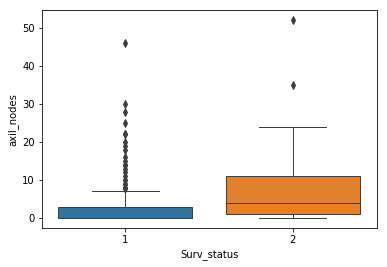

In [0]:
#Box plot of axil_nodes
sns.boxplot(x='Surv_status', y='axil_nodes', data=haberman, linewidth=1.0)
plt.show()

### Observation:
- Box plot tells you the percentile and also tells the error rate.
- If I set the threshold value is 8 of axil_nodes, my 60% of patients who died within 5 years considers as survived.
- In the above box plot error percentage is 60%.

Note: Please find the attached screens of Boxplot.

# Violin plot

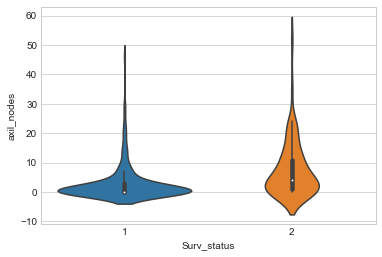

In [0]:
# Violinplot of survival status and axisl_nodes. 

sns.violinplot(x="Surv_status", y="axil_nodes", data=haberman, size=8)
plt.show()

### Observations:
- Violon plots is the combination of Box plot and Histogram. Using violin plots, we can find density and percentile.
- In above plot we can classify 25th, 50th, 75th percentiles and upper and lower whisker. white dot says 50th percentile or median.

# Multivariate Density plot

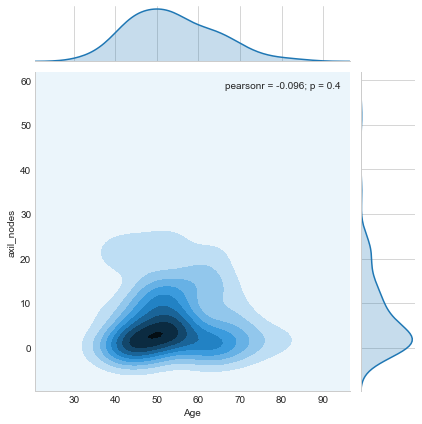

In [0]:
# Contour density plot with the data of Patients_died_within_5years.
# Here x-axis is Age and y-axis is axil_nodes and data is patients died within 5 years.
plt.close()
sns.jointplot(x="Age", y="axil_nodes", data=patient_died_within_5years, kind="kde")
plt.show()

### Observation:
- With the contour map, we can see Darker blue is having much higher points than light blue.
- We can write a model based on Age and axil_nodes

- Below model represents, more number of patients who died within 5 years.

#if ((Age>=48 and Age<=52) and (axil_nodes>=1 and axil_nodes<=2.5)):
    Surv_status = 2 (Patient who died within 5 years)
    

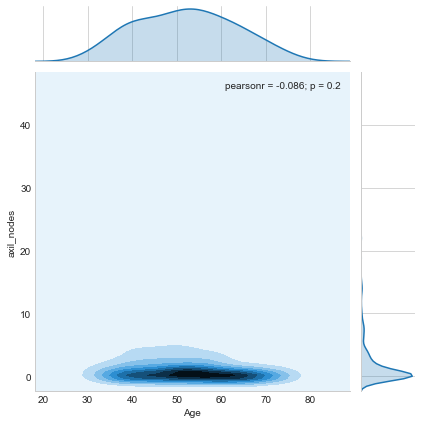

In [0]:
# Contour density plot with the data of Patients_longerthan_5years.
# Here x-axis is Age and y-axis is axil_nodes and data is patients died within 5 years.

plt.close()
sns.jointplot(x="Age", y="axil_nodes", data=patient_longerthan_5years, kind="kde")
plt.show()

### Observation:
- I can write a simple model that can distinguish my patients data who survived longer than 5 years.

- Below model represents, more number of patients who survived longer than 5 years.
- if ((Age>=49 and Age>=62) and (axil_nodes>=0 and axil_nodes<=2)):
-    Surv_status = 2 (Patient who died within 5 years)